In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Read Data
test = data.DataReader(['TSLA', 'AAPL'], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes  Adj Close                 Close                  High             \
Symbols          TSLA       AAPL       TSLA       AAPL       TSLA       AAPL   
Date                                                                           
2018-01-02  21.368668  41.018433  21.368668  43.064999  21.474001  43.075001   
2018-01-03  21.150000  41.011280  21.150000  43.057499  21.683332  43.637501   
2018-01-04  20.974667  41.201778  20.974667  43.257500  21.236668  43.367500   
2018-01-05  21.105333  41.670879  21.105333  43.750000  21.149332  43.842499   
2018-01-08  22.427334  41.516098  22.427334  43.587502  22.468000  43.902500   

Attributes        Low                  Open                  Volume  \
Symbols          TSLA       AAPL       TSLA       AAPL         TSLA   
Date                                                                  
2018-01-02  20.733334  42.314999  20.799999  42.540001   65283000.0   
2018-01-03  21.036667  42.990002  21.400000  43.132500   67822500.0   
2018-01-04  20.378668  43.020000  20.858000  43.134998  149194500.0   
2018-01-05  20.799999  43.262501  21.108000  43.360001   68868000.0   
2018-01-08  21.033333  43.482498  21.066668  43.587502  147891000.0   

Attributes               
Symbols            AAPL  
Date                     
2018-01-02  102223600.0  
2018-01-03  118071600.0  
2018-01-04   89738400.0  
2018-01-05   94640000.0  
2018-01-08   82271200.0

In [7]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,AAPL
Date,,
2018-01-02,21.368668,41.018433
2018-01-03,21.150000,41.011280
2018-01-04,20.974667,41.201778
2018-01-05,21.105333,41.670879
2018-01-08,22.427334,41.516098


In [8]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).

It can be calculated for each company by using built in .var() function. Under the hood, the formula implemented by this function is given by:

s2=∑i=1N(xi–x¯)2/N−1

In [9]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483733956322902

In [11]:
aapl = test['AAPL'].pct_change().apply(lambda x: np.log(1+x))
aapl.head()

Date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004634
2018-01-05    0.011321
2018-01-08   -0.003721
Name: AAPL, dtype: float64

In [12]:
# Variance
var_aapl =aapl.var()
var_aapl
#> .00045697258417022536

0.0003027765108439065

Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.

In [13]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
aapl_vol = np.sqrt(var_aapl * 250)
tesla_vol, aapl_vol
#> .5358109337568289  .33799873674698305

(0.5358109264545401, 0.27512565803824374)

<AxesSubplot:xlabel='Symbols'>

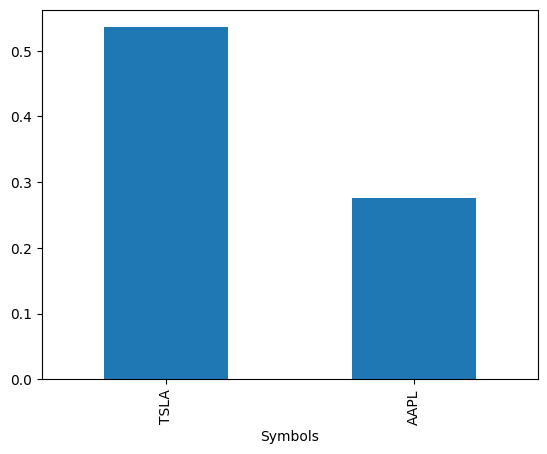

In [14]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of Tesla and Facebook by using the .cov() function.

In [15]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,AAPL
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,-0.000174
2018-01-04,-0.008325,0.004634
2018-01-05,0.006210,0.011321
2018-01-08,0.060755,-0.003721


In [16]:
# Covariance
test1['TSLA'].cov(test1['AAPL'])
#> .00018261623156030972

0.00019007693506929526

You can notice that there is small positive covariance between Tesla and AAPL.

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

You can think of correlation as a scaled version of covariance, where the values are restricted to lie between -1 and +1.

A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

This is calculated using the .corr() function.

In [17]:
test1['TSLA'].corr(test1['AAPL'])
#> .2520883272466132

0.3223493280285653